In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt 

In [2]:
with xr.open_dataset('./nc/constant.nc') as constant: 
    # Round time to 3 decimals so there is proper alignment
    constant["t"] = constant.t.round(decimals=3)

    # Apply coordinate transform
    constant["Z"] = constant.zbed + constant.Z * constant.height 

with xr.open_dataset('./nc/variable.nc') as variable: 
    # Round time to 3 decimals so there is proper alignment
    variable["t"] = variable.t.round(decimals=3)

    # Apply coordinate transform
    variable["Z"] = variable.zbed + variable.Z * variable.height 
    
with xr.open_dataset('./nc/variable_fixed_diff.nc') as variable2: 
    # Round time to 3 decimals so there is proper alignment
    variable2["t"] = variable2.t.round(decimals=3)

    # Apply coordinate transform
    variable2["Z"] = variable2.zbed + variable2.Z * variable2.height 

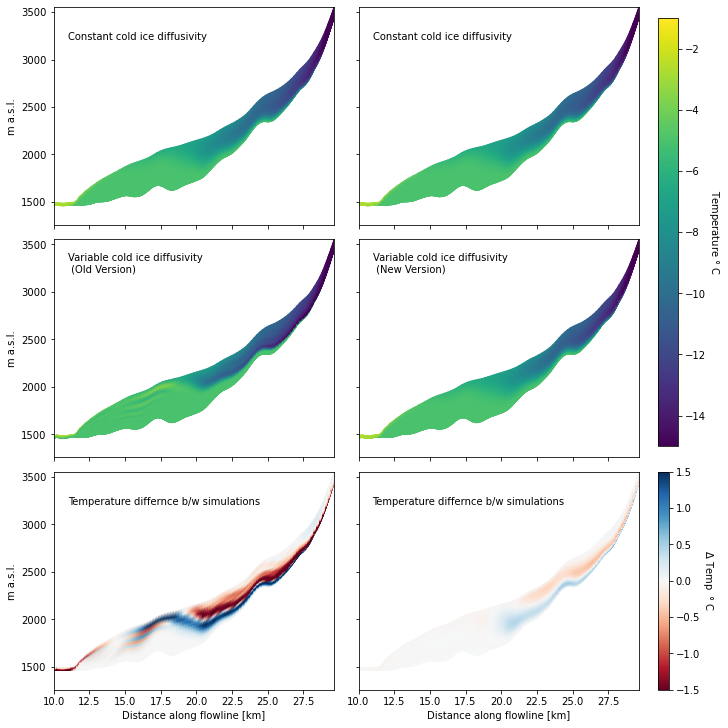

In [26]:
fig, ax = plt.subplots(3,2,sharex=True, sharey=True,
                       figsize=(10,10),
                       constrained_layout=True
                      )

# Constant
im   = ax[0,0].pcolormesh(constant.X / 1e3, 
                        constant.Z.isel(t=-1), 
                        constant.temperature.isel(t=-1),
                        vmin=-15, vmax=-1,
                        shading='gouraud')

ax[0,0].text(0.05, 0.85, 'Constant cold ice diffusivity', 
         transform=ax[0,0].transAxes)

im   = ax[0,1].pcolormesh(constant.X / 1e3, 
                        constant.Z.isel(t=-1), 
                        constant.temperature.isel(t=-1),
                        vmin=-15, vmax=-1,
                        shading='gouraud')

ax[0,1].text(0.05, 0.85, 'Constant cold ice diffusivity', 
         transform=ax[0,1].transAxes)


# Variable 

im   = ax[1,0].pcolormesh(variable.X / 1e3, 
                        variable.Z.isel(t=-1), 
                        variable.temperature.isel(t=-1),
                        vmin=-15, vmax=-1,
                        shading='gouraud')

ax[1,0].text(0.05, 0.85, 'Variable cold ice diffusivity \n (Old Version)', 
         transform=ax[1,0].transAxes)

im   = ax[1,1].pcolormesh(variable2.X / 1e3, 
                        variable2.Z.isel(t=-1), 
                        variable2.temperature.isel(t=-1),
                        vmin=-15, vmax=-1,
                        shading='gouraud')

ax[1,1].text(0.05, 0.85, 'Variable cold ice diffusivity \n (New Version)', 
         transform=ax[1,1].transAxes)

# Difference 

diff = ax[2,0].pcolormesh(variable.X / 1e3, 
                        variable.Z.isel(t=-1), 
                        variable.temperature.isel(t=-1)- constant.temperature.isel(t=-1),
                        vmin=-1.5, vmax=1.5,
                        shading='gouraud', 
                        cmap='RdBu')

ax[2,0].text(0.05, 0.85, 'Temperature differnce b/w simulations', 
         transform=ax[2,0].transAxes)

diff = ax[2,1].pcolormesh(variable.X / 1e3, 
                        variable.Z.isel(t=-1), 
                        variable2.temperature.isel(t=-1)- constant.temperature.isel(t=-1),
                        vmin=-1.5, vmax=1.5,
                        shading='gouraud', 
                        cmap='RdBu')

ax[2,1].text(0.05, 0.85, 'Temperature differnce b/w simulations', 
         transform=ax[2,1].transAxes)


ax[0,0].set_xlim(10e3 / 1e3,None)

for i in range(0,3):
    ax[i,0].set_ylabel('m a.s.l.')    

ax[2,0].set_xlabel('Distance along flowline [km]')    
ax[2,1].set_xlabel('Distance along flowline [km]')    

cbar0 = fig.colorbar(im,   ax=ax[0:2, :], shrink=0.95)
cbar1 = fig.colorbar(diff, ax=ax[2,:])

cbar0.set_label('Temperature $\degree$ C', rotation=270, labelpad=15)
cbar1.set_label('$\Delta$ Temp  $\degree$ C', rotation=270, labelpad=15)

#plt.subplots_adjust(wspace=0.1)
fig.savefig('diffusivity.png', dpi=300, bbox_inches='tight', facecolor='w')

In [4]:
np.minimum(constant.temperature.min().values, 
           variable.temperature.min().values)

np.maximum(constant.temperature.max().values, 
           variable.temperature.max().values)

-1.3988910913467407

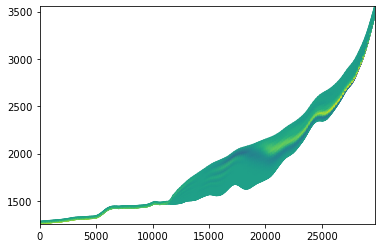

In [5]:
plt.pcolormesh(variable2.X, 
               variable2.Z.isel(t=-1), 
               variable2.temperature.isel(t=-1) - variable.temperature.isel(t=-1), shading='gouraud')

In [ ]:
611 / 1e6

In [ ]:
2.1/2050.0